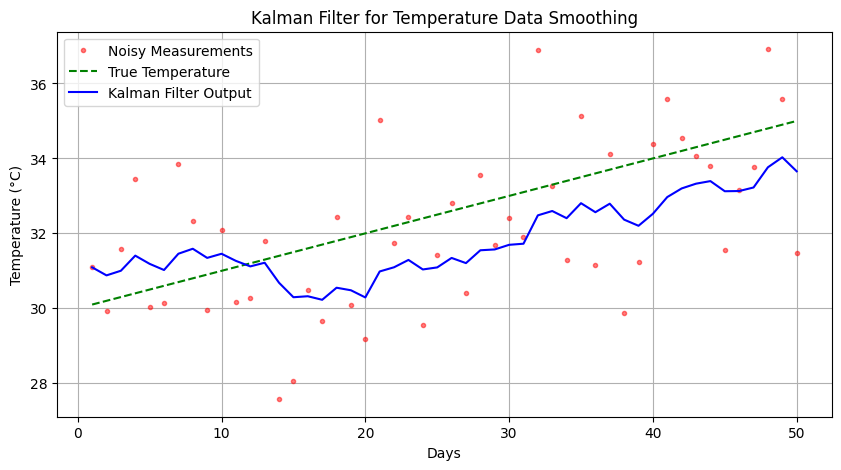

In [5]:
from pykalman import KalmanFilter
import numpy as np
from matplotlib import pyplot as plt

# Simulasi data noisy suhu (misalnya dari sensor)
np.random.seed(42)
days = np.arange(1, 51)  # 50 hari
true_temperature = 30 + 0.1 * days  # Tren suhu meningkat
noisy_temperature = true_temperature + np.random.normal(0, 2, size=len(days))  # Tambahkan noise

# Inisialisasi Kalman Filter
kf = KalmanFilter(initial_state_mean=noisy_temperature[0],
                  n_dim_obs=1,
                  transition_matrices=[1],
                  observation_matrices=[1],
                  observation_covariance=4,  # Variance of observation noise (sigma^2)
                  transition_covariance=0.1)  # Model system noise

# Melakukan estimasi dengan Kalman Filter
filtered_temperature, _ = kf.filter(noisy_temperature)

# Plot hasil
plt.figure(figsize=(10, 5))
plt.plot(days, noisy_temperature, 'r.', alpha=0.5, label="Noisy Measurements")
plt.plot(days, true_temperature, 'g--', label="True Temperature")
plt.plot(days, filtered_temperature, 'b-', label="Kalman Filter Output")
plt.xlabel("Days")
plt.ylabel("Temperature (°C)")
plt.title("Kalman Filter for Temperature Data Smoothing")
plt.legend()
plt.grid(True)
plt.show()


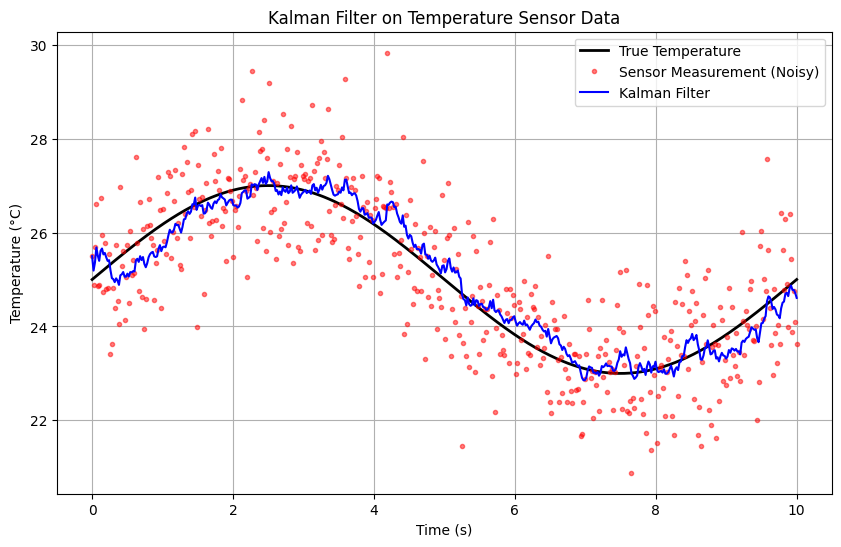

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Simulasi data suhu
np.random.seed(42)
time = np.linspace(0, 10, 500)  # 10 detik, 500 sampel

# Suhu sebenarnya (misalnya suhu ruangan berubah perlahan)
true_temperature = 25 + 2 * np.sin(2 * np.pi * 0.1 * time)  

# Data sensor dengan noise
sensor_temperature = true_temperature + np.random.normal(0, 1, size=len(time))  # noise ±1°C

# 2. Inisialisasi Kalman Filter
x_est = np.zeros_like(time)  # Estimasi suhu
P = np.zeros_like(time)      # Kovarians error

x_est[0] = sensor_temperature[0]  # Inisialisasi dengan nilai sensor pertama
P[0] = 1  # Inisialisasi variansi awal

Q = 0.01  # Variansi noise proses (tuning parameter)
R = 1.0   # Variansi noise pengukuran (tuning parameter)

# 3. Loop Kalman Filter
for k in range(1, len(time)):
    # *** Prediction Step ***
    x_pred = x_est[k-1]  # Asumsi suhu berubah perlahan (tanpa model kecepatan)
    P_pred = P[k-1] + Q  # Prediksi kovarians error

    # *** Update Step ***
    K = P_pred / (P_pred + R)  # Kalman Gain
    x_est[k] = x_pred + K * (sensor_temperature[k] - x_pred)  # Update estimasi suhu
    P[k] = (1 - K) * P_pred  # Update kovarians error

# 4. Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(time, true_temperature, 'k-', label='True Temperature', linewidth=2)
plt.plot(time, sensor_temperature, 'r.', alpha=0.5, label='Sensor Measurement (Noisy)')
plt.plot(time, x_est, 'b-', label='Kalman Filter')

plt.title("Kalman Filter on Temperature Sensor Data")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


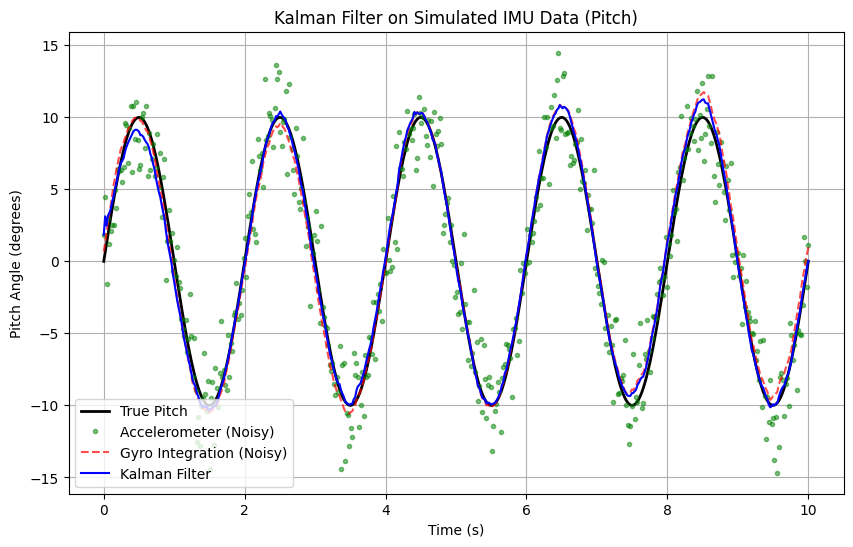

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Inisialisasi data simulasi
np.random.seed(42)
time = np.linspace(0, 10, 500)  # 10 detik, 500 sampel
dt = time[1] - time[0]          # Delta t

# Sudut pitch sebenarnya (sinusoidal)
true_pitch = 10 * np.sin(2 * np.pi * 0.5 * time)

# Gyroscope rate (turunan dari pitch)
true_gyro_rate = np.gradient(true_pitch, dt)

# Tambahkan noise
gyro_rate_noisy = true_gyro_rate + np.random.normal(0, 5, size=len(time))  # noise ±5 deg/s
acc_pitch_noisy = true_pitch + np.random.normal(0, 2, size=len(time))      # noise ±2 deg

# 2. Inisialisasi variabel Kalman Filter
x_est = np.zeros_like(time)  # Estimasi sudut
P = np.zeros_like(time)      # Kovarians error

x_est[0] = acc_pitch_noisy[0]  # Inisialisasi dengan sudut dari accelerometer
P[0] = 1  # Inisialisasi variansi awal

Q = 0.001  # Variansi noise proses (tuning parameter)
R = 2.0    # Variansi noise pengukuran (tuning parameter)

# 3. Loop Kalman Filter
for k in range(1, len(time)):
    # *** Prediction Step ***
    x_pred = x_est[k-1] + gyro_rate_noisy[k] * dt  # Prediksi sudut dengan gyro
    P_pred = P[k-1] + Q  # Prediksi kovarians error

    # *** Update Step ***
    K = P_pred / (P_pred + R)  # Kalman Gain
    x_est[k] = x_pred + K * (acc_pitch_noisy[k] - x_pred)  # Update estimasi sudut
    P[k] = (1 - K) * P_pred  # Update kovarians error

# 4. Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(time, true_pitch, 'k-', label='True Pitch', linewidth=2)
plt.plot(time, acc_pitch_noisy, 'g.', alpha=0.5, label='Accelerometer (Noisy)')
plt.plot(time, gyro_rate_noisy.cumsum() * dt, 'r--', alpha=0.7, label='Gyro Integration (Noisy)')
plt.plot(time, x_est, 'b-', label='Kalman Filter')

plt.title("Kalman Filter on Simulated IMU Data (Pitch)")
plt.xlabel("Time (s)")
plt.ylabel("Pitch Angle (degrees)")
plt.legend()
plt.grid(True)
plt.show()


## **Rumus Kalman Filter**
Kalman Filter bekerja dalam dua tahap:
1. **Prediksi (Prediction Step)**
   - Prediksi keadaan (*state estimation*):
     $
     \hat{x}_k^{-} = \hat{x}_{k-1} + \omega_{\text{gyro}}(k) \cdot \Delta t
     $
   - Prediksi kovarians error:
     $
     P_k^{-} = P_{k-1} + Q
     $
   
2. **Update (Correction Step)**
   - Kalman Gain:
     $
     K_k = \frac{P_k^{-}}{P_k^{-} + R}
     $
   - Koreksi estimasi keadaan:
     $
     \hat{x}_k = \hat{x}_k^{-} + K_k (z_k - \hat{x}_k^{-})
     $
   - Koreksi kovarians error:
     $
     P_k = (1 - K_k) P_k^{-}
     $

Keterangan:
- $ \hat{x}_k $ = estimasi sudut setelah update.
- $ \hat{x}_k^{-} $ = prediksi sudut sebelum update.
- $ \omega_{\text{gyro}}(k) $ = data gyro (kecepatan sudut).
- $ P_k $ = variansi error estimasi.
- $ Q $ = variansi noise proses.
- $ R $ = variansi noise pengukuran dari accelerometer.
- $ z_k $ = pengukuran sudut dari accelerometer.
- $ K_k $ = Kalman Gain.

---